# 1) Leer una tabla de valores correspondientes a proyecciones de población de Chile. Sobre la base de los valores existentes entre 2002 y 2012 se han hecho estimaciones para los años 2013-2020. 

y apertura de archivo

In [197]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
base = pd.read_csv("base_final.csv")
bs = base

In [198]:
#Veamos la cantidad de filas y columnas de el dataframe
bs.shape

(56052, 28)

In [199]:
#revisemos si hay datos nulos o vacios (Nan)
bs.loc[:,'a2002':].isnull().sum()

a2002     7973
a2003     7206
a2004     6453
a2005    12692
a2006     9094
a2007     7768
a2008    11629
a2009    13329
a2010    11530
a2011     8420
a2012     7565
a2013    10900
a2014    11060
a2015     6852
a2016    12982
a2017     9625
a2018    11320
a2019     9465
a2020    16816
dtype: int64

In [200]:
#Busquemos numeros negativos, podemos ver varias columnas con 1 o mas datos negativos(menores a 0)
(bs.loc[:,'a2002':]<0).sum()

a2002    1
a2003    0
a2004    0
a2005    0
a2006    1
a2007    1
a2008    0
a2009    0
a2010    0
a2011    0
a2012    2
a2013    0
a2014    0
a2015    2
a2016    0
a2017    0
a2018    2
a2019    1
a2020    0
dtype: int64

# 2) Funcion para eliminar datos 'nan' y negativos

y asi poder trabajar de forma mas limpia en la base de datos.

#### a) **Si los valores nan representan más del 25% de sus datos se debe eliminar la columna.**

#### b) **Reparar un valor faltante**

 Se puede reemplazarlo por otro. 
 
 Por ejemplo en este caso si falta un valor para un año, puede usar el valor del cuantil 70 de la fila.
#### c) **Repara valores negativos**
 En caso de que una fila tenga valores negativos se deben reemplazar por el cuantil 70 de la fila. 
 ¿Por qué cree usted que se debe realizar este procedimiento?.  


In [201]:
def valores_na(df):
    totnulos=df.iloc[:,1:].isnull().sum()      #Total de datos nulos
    totdatos=df.iloc[:,1:].isnull().count()    #Total de datos
    porcent_base=(((totnulos)/(totdatos))*100) #Calcula el porcentaje entre el total de numeros nulos dividido con el total de los datos multiplicado por 100 
    df1 = pd.DataFrame(totnulos, columns=['Total nulos'])
    df2 = pd.DataFrame(porcent_base, columns=['% de nulos'])
    df3= pd.concat([df1, df2], join='outer', axis=1).reindex(df1.index)
    print(df3.tail(18))
    for i,j in porcent_base.items():           #Recorre la serie panda "porcent_base" y
        if j>25:                               #compara si ese item('j') es mayor a 25%
            df.drop([i],axis=1, inplace=True)  #si es asi elimina la columna obtenida en ('i') del DataFrame
      

In [202]:
#Vamos a eliminar la columna o columnas que tiene sobre el 25% de datos nulos
bs.columns 

Index(['Unnamed: 0', 'Region', 'Nombre_region', 'Provincia',
       'Nombre_provincia', 'Comuna', 'Nombre_comuna', 'Sexo', 'Edad', 'a2002',
       'a2003', 'a2004', 'a2005', 'a2006', 'a2007', 'a2008', 'a2009', 'a2010',
       'a2011', 'a2012', 'a2013', 'a2014', 'a2015', 'a2016', 'a2017', 'a2018',
       'a2019', 'a2020'],
      dtype='object')

In [203]:
valores_na(bs)

       Total nulos  % de nulos
a2003         7206   12.855920
a2004         6453   11.512524
a2005        12692   22.643260
a2006         9094   16.224220
a2007         7768   13.858560
a2008        11629   20.746807
a2009        13329   23.779705
a2010        11530   20.570185
a2011         8420   15.021766
a2012         7565   13.496396
a2013        10900   19.446229
a2014        11060   19.731678
a2015         6852   12.224363
a2016        12982   23.160637
a2017         9625   17.171555
a2018        11320   20.195533
a2019         9465   16.886106
a2020        16816   30.000714


In [204]:
#Vemos como la columna 'a2020' fue eliminada ya que tenia mas del 25% de los datos nulos
bs.columns

Index(['Unnamed: 0', 'Region', 'Nombre_region', 'Provincia',
       'Nombre_provincia', 'Comuna', 'Nombre_comuna', 'Sexo', 'Edad', 'a2002',
       'a2003', 'a2004', 'a2005', 'a2006', 'a2007', 'a2008', 'a2009', 'a2010',
       'a2011', 'a2012', 'a2013', 'a2014', 'a2015', 'a2016', 'a2017', 'a2018',
       'a2019'],
      dtype='object')

In [205]:
num = bs._get_numeric_data() #tomamos solo los datos numeros de el dataframe
num[num<0]=None              #y buscamos los menores a 0 y los reemplazamos por 'None'
# bs= bs.loc[:,:].where(bs.isnull()==False, 
#                       (bs.loc[:,'a2002':].quantile(.7, axis=1)), axis=0) #Reemplaza los valores Nones por el quantil 0.7
bs= bs.fillna(bs.loc[:,'a2002':].quantile(.7, axis=0)) #reemplazamos los None con el quantile 0.7

In [206]:
#aqui podemos revisar que ya no existen datos nulos en las columnas
bs.loc[:,'a2002':].isnull().sum()

a2002    0
a2003    0
a2004    0
a2005    0
a2006    0
a2007    0
a2008    0
a2009    0
a2010    0
a2011    0
a2012    0
a2013    0
a2014    0
a2015    0
a2016    0
a2017    0
a2018    0
a2019    0
dtype: int64

In [207]:
#Tampoco existen datos negativos en las columnas
(bs.loc[:,'a2002':]<0).sum()

a2002    0
a2003    0
a2004    0
a2005    0
a2006    0
a2007    0
a2008    0
a2009    0
a2010    0
a2011    0
a2012    0
a2013    0
a2014    0
a2015    0
a2016    0
a2017    0
a2018    0
a2019    0
dtype: int64

### Calculo media, desviacion standar, media truncada

In [208]:
media=bs.loc[:,'a2002':].mean() #calculamos la media
dst=bs.loc[:,'a2002':].std()     #calculamos la desviacion estandar
medtrunc=pd.Series(stats.trim_mean(bs.loc[:,'a2002':],0.3,axis=1)) #calculo media truncada para reemplazar outliers

### d) Reemplazar outliers por media truncada

In [209]:
#reemplzamos los valores que se encuentran demasiado fuera de los datos (Outliers) usando la la funcion 'where' ´para ello
#esta funcion realiza lo contratio de cuando se cumple su condicion, por ejemplo: 
#preguntamos donde estan los datos menores a la (media-3veces la desviacion standar)  a para reemplazar los mayores con la media truncada
bsx=bs.loc[:,:].where((bs.loc[:,'a2002':].lt(media+3*dst,axis=1)&(bs.loc[:,'a2002':].gt(media-3*dst,axis=1))),medtrunc, axis=0)


#### d.1) Boxplot

In [211]:
def boxplot (opr,opa):
    #Creamos unaserie con todas las regiones para usar el menu de mas adelante
    regiones=pd.Series(bs['Nombre_region'].unique()).rename(index=lambda x:x+1)  
    regiones[opr]
                  
    #Creamos unaserie con todas las regiones para usar el menu de mas adelante
    años=pd.Series(bs.iloc[:,9:].columns).rename(index=lambda x:x+1)
    años[opa]
                 
    Boxplot = pd.concat([bs['Nombre_region'],bs[años[opa]],bsx[años[opa]]],axis=1).reindex(bs.index)
    
    n=Boxplot.groupby(['Nombre_region'])
    n.get_group(regiones[opr]).boxplot(figsize=(10,6))
    plt.title(f"Boxplot comparativo de la region\n {regiones[opr]} del año {años[opa]} ")
    plt.ylabel("Numero de Habitantes")
    plt.xlabel("Antes y despues")
    

### Menu que ejecuta funcion para graficar Año con Outliers y sin Outliers

Seleccione Region a calcular
1-Tarapaca     2-Antofagasta
3-Atacama      4-Coquimbo
5-Valparaiso   6-O'Higgins
7-Maule        8-Biobío
9-Araucanía   10-Los Lagos
11-Aysén      12-Magallanes y la Antártica
13-Región Metropolitana
14-Los Ríos   15-Arica y Parinacota
1
Seleccione año
1-a2002   2-a2003
3-a2004   4-a2005
5-a2006   6-a2007
7-a2008   8-a2009
9-a2010   10-a2011
11-a2012  12-a2013
13-a2014  14-a2015
15-a2016  16-a2017
17-a2018  18-a2019
18


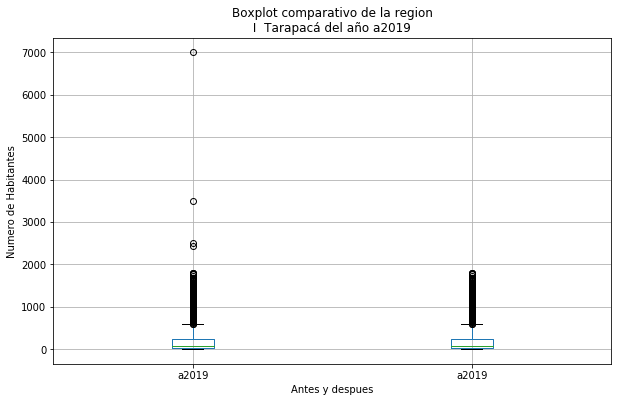

In [212]:
opr=int(input("Seleccione Region a calcular\n1-Tarapaca     2-Antofagasta\n3-Atacama      4-Coquimbo\n5-Valparaiso   6-O'Higgins\n7-Maule        8-Biobío\n9-Araucanía   10-Los Lagos\n11-Aysén      12-Magallanes y la Antártica\n13-Región Metropolitana\n14-Los Ríos   15-Arica y Parinacota\n"))
opa=int(input("Seleccione año\n1-a2002   2-a2003\n3-a2004   4-a2005\n5-a2006   6-a2007\n7-a2008   8-a2009\n9-a2010   10-a2011\n11-a2012  12-a2013\n13-a2014  14-a2015\n15-a2016  16-a2017\n17-a2018  18-a2019\n"))
boxplot(opr,opa)


# 3) Crear DataFrame con calculos de IM, IAM, IDD:

IM=Indice de Masculinidad, IAM= Indice de Adulto Mayor, IDD= Indice de Dependencia Demografica


#### a) **IM:** Índice de masculinidad, se refiere al número de hombres por cada 100 mujeres en una determinada zona demográfica.


In [213]:
#CALCULO INDICE MASCULINIDAD !!por año¡¡
bs.loc[:,'a2002':]=bsx
bs2=bs
Hombres = bs2[bs2['Sexo']==1].groupby(['Nombre_region']).mean().loc[:,'a2002':]
Mujeres = bs2[bs2['Sexo']==2].groupby(['Nombre_region']).mean().loc[:,'a2002':]
IM = ((Hombres/Mujeres)*100)
IM.index = bs2.groupby(['Nombre_region']).sum().index


#### b)**IAM:**	Índice de adulto mayor, es el cuociente entre el número de  personas mayores a 60 años por cada 100 personas menores de 15 años.


In [214]:
# #CALCULO INDICE ADULTO MAYOR !!por año¡¡
bs3=bs2
m15 = bs3[bs3['Edad']<15].groupby(['Nombre_region']).mean().loc[:,'a2002':]
m60 = bs3[bs3['Edad']>60].groupby(['Nombre_region']).mean().loc[:,'a2002':]
IAM = ((m60/m15)*100)
IAM.index = bs3.groupby(['Nombre_region']).sum().index


#### c) **IDD:** Índice de dependencia demográfica, expresa el índice de personas dependientes por cada cien personas potencialmente activas, es decir, la razón entre las de personas mayores de 60 años sumadas a las menores de 15, por cada 100 personas entre los 15 y 60 años (inclusive).


In [215]:
# #CALCULO INDICE DEPENDENCIA DEMOGRAFICA
bs4=bs3
sum15y60 = bs4[(bs4['Edad']<=15)|(bs4['Edad']>=60)].groupby(['Nombre_region']).sum().loc[:,'a2002':]
entre1659 = bs4[(bs4['Edad']>15)&(bs4['Edad']<60)].groupby(['Nombre_region']).sum().loc[:,'a2002':]
IDD = ((sum15y60/entre1659)*100)
IDD.index = bs4.groupby(['Nombre_region']).sum().index

# DATAFRAME CON INDICES
### Indice Masculinidad, Indice Adulto Mayor, Indice Dependencia Demografica

In [216]:
años=pd.Series(bs.loc[:,'a2002':].columns).rename(index=lambda x:x+1)
años[opa]
indices = pd.concat([IM[años[opa]],IAM[años[opa]],IDD[años[opa]]], axis=1).reindex(IM.index)

indices.columns = ['Indice Masculinidad','Indice Adulto Mayor','Indice Dependencia Demografica']
print("\t\t\tLos indices del año",años[opa],"son:")
indices

			Los indices del año a2019 son:


,Indice Masculinidad,Indice Adulto Mayor,Indice Dependencia Demografica
Nombre_region,,,
I Tarapacá,104.462538,44.578089,61.540728
II Antofagasta,100.503000,45.206586,64.893147
III Atacama,108.138658,51.885858,66.255449
IV Coquimbo,95.433291,61.226202,69.334991
IX Araucanía,101.671091,65.741359,66.768561
Región Metropolitana,98.099845,57.724532,60.586407
V Valparaíso,94.673150,73.013022,67.149828
VI O'Higgins,101.102832,74.238721,66.034941
VII Maule,97.604916,71.464456,67.515700


# Grafico de indices

Luego, grafique dichos índices e identifique las 10 regiones que tienen los valores más altos en los indicadores. 


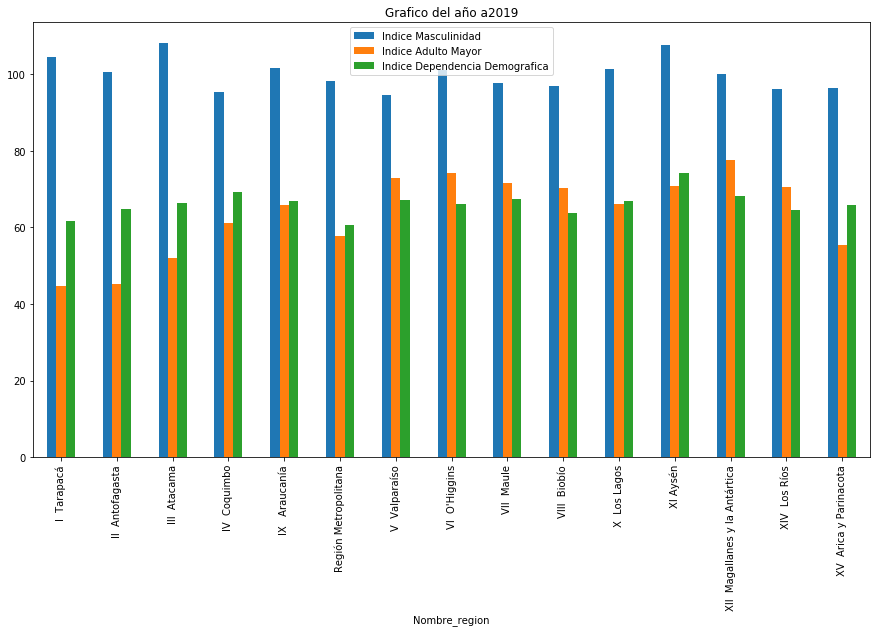

In [217]:
#Se grafica el Dataframe anterior
indices.plot.bar(figsize=(15,8));
plt.title(f'Grafico del año {años[opa]}');

## 4) Haga una tabla que resuma el total de habitantes por región para cada año.


In [218]:
totalhabreg = bs.groupby(['Nombre_region']).sum().loc[:,'a2002':]
totalhabreg

,a2002,a2003,a2004,a2005,a2006,a2007,a2008,a2009,a2010,a2011,a2012,a2013,a2014,a2015,a2016,a2017,a2018,a2019
Nombre_region,,,,,,,,,,,,,,,,,,
I Tarapacá,236602.625,258157.625,259610.750,260255.375,250095.000,271567.500,268037.125,273437.500,283488.875,304364.875,309666.250,315825.500,304818.875,330716.000,335912.375,341219.875,339068.375,355635.750
II Antofagasta,503566.250,504299.000,497930.625,494157.000,489404.125,512719.000,507778.250,507252.750,514377.250,544453.875,564791.250,533845.125,535393.750,547105.125,526081.625,559085.125,562028.375,546949.125
III Atacama,268452.000,274276.000,272867.000,272650.000,276934.000,279259.000,292103.000,294791.000,302288.000,300055.000,307551.000,312583.000,308724.000,310412.000,321574.750,322382.750,329176.750,327584.750
IV Coquimbo,602598.125,612223.500,633149.500,629322.750,643063.000,648674.250,658899.375,652324.000,679744.500,701926.125,713223.750,707779.875,706039.375,727994.625,714773.500,732463.000,730883.500,767216.625
IX Araucanía,920550.625,930212.125,949834.125,950693.125,950186.625,951451.000,970742.125,992571.000,993653.125,1003797.250,986968.625,1017455.875,1008176.625,1002367.375,1044730.000,1025748.000,1042054.375,1045636.375
Región Metropolitana,5701343.000,5763998.000,5903200.375,5477761.750,5792811.375,5989496.125,5767647.750,5505855.750,5822403.375,6101505.875,6317923.250,6003609.250,6041605.500,6461586.875,5974038.625,6327182.250,6258946.000,6381267.000
V Valparaíso,1535005.625,1547349.000,1572223.750,1510070.250,1575687.875,1623785.625,1613236.375,1612993.375,1636787.625,1682447.750,1697071.500,1722130.250,1731094.750,1726541.000,1736184.250,1764042.500,1774616.375,1789283.750
VI O'Higgins,833123.875,848396.750,853341.750,880515.375,888052.250,897654.125,922235.500,935393.875,939068.500,932459.375,934387.875,954458.250,969501.000,958672.625,1010582.500,989039.375,1012942.000,1009564.875
VII Maule,926022.250,946231.875,956458.750,974703.375,980754.000,992872.250,997782.000,1018999.875,1015685.000,1023396.250,1032668.000,1030975.625,1051211.500,1052561.625,1067075.875,1067591.000,1074337.875,1097803.250


## 5) Haga una tabla que resuma el total de habitantes por región y por sexo.


In [219]:
totalhabregysex = bs.groupby(['Nombre_region','Sexo']).sum().loc[:,'a2002':]
totalhabregysex

a2002        a2003        a2004  \
Nombre_region                  Sexo                                          
I  Tarapacá                    1      123465.625   131080.625   135808.500   
                               2      113137.000   127077.000   123802.250   
II  Antofagasta                1      268334.625   263743.875   267321.750   
                               2      235231.625   240555.125   230608.875   
III  Atacama                   1      135595.000   137410.000   139165.000   
                               2      132857.000   136866.000   133702.000   
IV  Coquimbo                   1      298655.750   302344.375   315520.750   
                               2      303942.375   309879.125   317628.750   
IX   Araucanía                 1      455006.250   460659.125   467530.125   
                               2      465544.375   469553.000   482304.000   
Región Metropolitana           1     2771693.875  2813823.625  2863749.500   
                               2     2929649.125  2950174.375  3039450.875   
V  Valparaíso                  1      749889.375   764392.875   772229.750   
                               2      785116.250   782956.125   799994.000   
VI  O'Higgins                  1      419109.000   430473.875   427340.625   
                               2      414014.875   417922.875   426001.125   
VII  Maule                     1      463872.000   474602.500   478456.625   
                               2      462150.250   471629.375   478002.125   
VIII  Biobío                   1      935073.125   938075.625   942007.000   
                               2      967539.375   978351.125   977111.500   
X  Los Lagos                   1      404662.250   396427.625   401933.875   
                               2      386871.000   385302.250   401126.875   
XI Aysén                       1       69146.000    65466.000    65867.000   
                               2       60989.000    59297.000    60124.000   
XII  Magallanes y la Antártica 1       97196.000    93385.000    89416.000   
                               2       86760.000    88302.000    80690.000   
XIV  Los Ríos                  1      192241.000   189741.000   190998.750   
                               2      187964.000   186599.000   191497.000   
XV  Arica y Parinacota         1       87268.750    94489.125    95330.000   
                               2       88495.000    93520.750    95858.500   

                                           a2005        a2006        a2007  \
Nombre_region                  Sexo                                          
I  Tarapacá                    1      134982.375   128836.000   140538.500   
                               2      125273.000   121259.000   131029.000   
II  Antofagasta                1      261810.250   242288.625   273712.000   
                               2      232346.750   247115.500   239007.000   
III  Atacama                   1      141641.000   139426.000   143836.000   
                               2      131009.000   137508.000   135423.000   
IV  Coquimbo                   1      307749.500   321251.000   324713.500   
                               2      321573.250   321812.000   323960.750   
IX   Araucanía                 1      479051.750   473195.000   466857.250   
                               2      471641.375   476991.625   484593.750   
Región Metropolitana           1     2681540.375  2839456.375  2945749.500   
                               2     2796221.375  2953355.000  3043746.625   
V  Valparaíso                  1      758438.125   776596.625   803451.500   
                               2      751632.125   799091.250   820334.125   
VI  O'Higgins                  1      437260.750   440623.125   449210.750   
                               2      443254.625   447429.125   448443.375   
VII  Maule                     1      488142.875   497391.625   493902.250   
                               2      486560.500   483362.375   

## 6) Encuentre las 10 comunas con el mayor IDD.


In [220]:
bs4=bs3
sum15y60 = bs4[(bs4['Edad']<=15)|(bs4['Edad']>=60)].groupby(['Nombre_comuna']).mean().loc[:,'a2002':]
entre1659 = bs4[(bs4['Edad']>15)&(bs4['Edad']<60)].groupby(['Nombre_comuna']).mean().loc[:,'a2002':]
idd = ((sum15y60/entre1659)*100)
idd.loc[:,'a2002':].mean(1).sort_values(ascending=False).head(10)

Nombre_comuna
Antártica         108.700201
Camarones         106.695019
Colchane          106.406851
Guaitecas         105.761498
Ollagüe           105.486940
Camiña            104.045940
Melipeuco         103.297767
Juan Fernández    103.205928
Pumanque          102.565557
General Lagos     101.701275
dtype: float64

## 7) Encuentre las 10 comunas con el mayor IM en la región metropolitana.


In [221]:
b2=bs
hombres = bs[(bs['Nombre_region']=='Región Metropolitana')&(bs['Sexo']==1)].groupby(['Nombre_comuna']).mean().loc[:,'a2002':]
mujeres = bs[(bs['Nombre_region']=='Región Metropolitana')&(bs['Sexo']==2)].groupby(['Nombre_comuna']).mean().loc[:,'a2002':]
im = ((hombres/mujeres)*100)
im.loc[:,'a2002':].mean(1).sort_values(ascending=False).head(10)

Nombre_comuna
Colina                114.045080
San Pedro             110.661062
Tiltil                107.208472
Melipilla             106.129156
Lampa                 106.083956
Paine                 105.259554
Curacaví              104.462742
María Pinto           104.397170
San José  de Maipo    104.216188
Isla de Maipo         103.570767
dtype: float64

## 8) Encuentre las 10 comunas con el mayor IAM.


In [222]:
bs2=bs
m15 = bs2[bs2['Edad']<=15].groupby(['Nombre_comuna']).mean().loc[:,'a2002':]
m60 = bs2[bs2['Edad']>=60].groupby(['Nombre_comuna']).mean().loc[:,'a2002':]
iam = ((m60/m15)*100).round()
iam.loc[:,'a2002':].mean(1).sort_values(ascending=False).head(10)

Nombre_comuna
Ollagüe          194.166667
Providencia      142.611111
Laguna Blanca    128.888889
Putre            127.055556
San Gregorio     127.000000
Antártica        119.500000
Río Verde        108.722222
Antuco           108.388889
Navidad          108.055556
Timaukel         108.000000
dtype: float64

## 9) Encuentre las 10 comunas que hayan tenido el menor crecimiento de poblacion femenina entre los años 2002 y 2012

In [223]:
fa2002 = bs[bs['Sexo']==2].groupby(['Nombre_comuna','Sexo']).sum().loc[:,'a2002']
fa2012 = bs[bs['Sexo']==2].groupby(['Nombre_comuna','Sexo']).sum().loc[:,'a2012']
crecifem=((fa2012/fa2002)*100)
cf=crecifem.sort_values().head(10)
print(f"Las 10 comunas con menor crecimiento son: \n {cf}")

Las 10 comunas con menor crecimiento son: 
 Nombre_comuna    Sexo
Antártica        2       67.710843
Alto del Carmen  2       68.262050
Río Hurtado      2       72.862096
Juan Fernández   2       76.802097
Contulmo         2       78.043763
Paredones        2       78.368737
Guaitecas        2       79.566110
Río Verde        2       79.815888
Cabo de Hornos   2       80.170273
Cisnes           2       80.469658
dtype: float64


## 10) Usando la tabla hecha en (4) con las regiones ordenadas de norte a sur, grafique el numero de habitantes por region para el año 2002,2012 y 2018

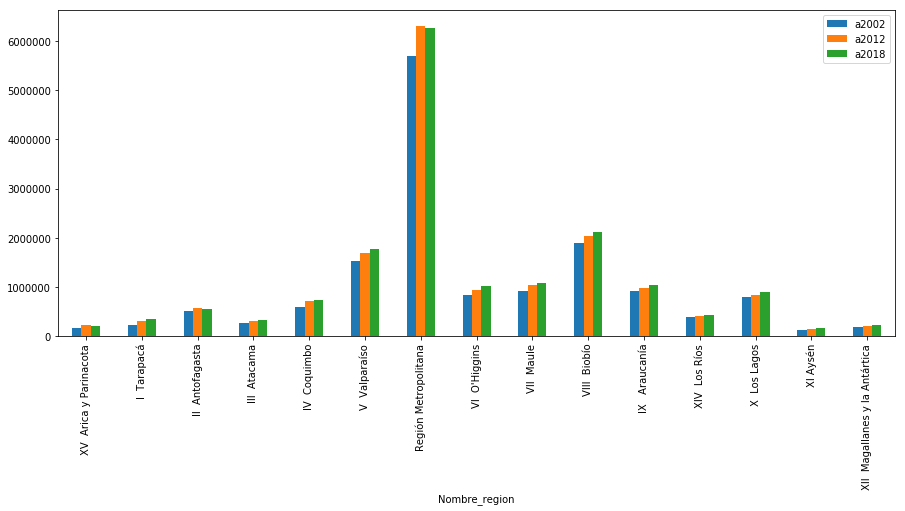

In [225]:
new_orden = [2, 3, 4, 5,11,7,6,8,9,10,13,14,15,12,1]
totalhabreg["orden"]=new_orden
totalhabreg.sort_values(by="orden")[['a2002','a2012','a2018']].plot.bar(figsize=(15,6));

## 11) Usando la tabla hecha en (5) con las regiones ordenadas de norte a sur, grafique el numero de habitantes por region para el año 2002,2012 y 2018 usando el sexo como matriz

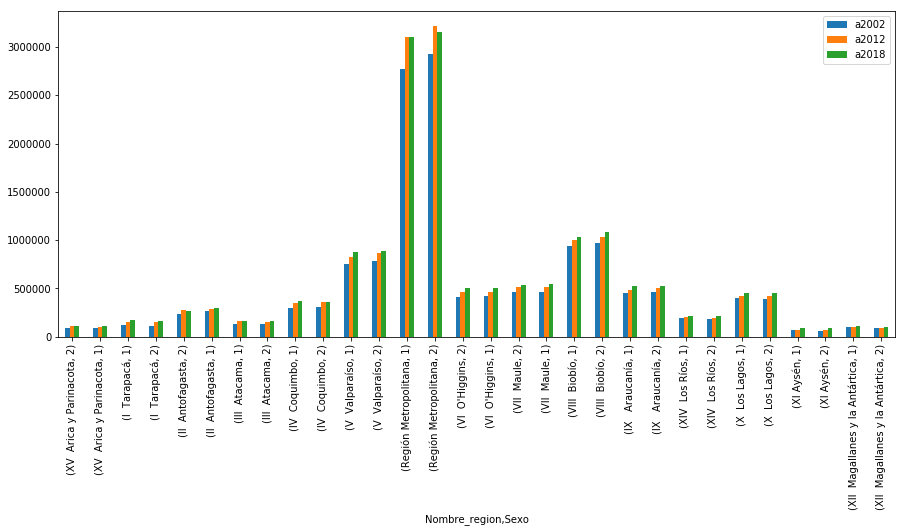

In [226]:
new_orden1 = [2,2, 3,3, 4,4, 5,5,11,11,7,7,6,6,8,8,9,9,10,10,13,13,14,14,15,15,12,12,1,1]
totalhabregysex["orden"]=new_orden1
totalhabregysex.sort_values(by="orden")[['a2002','a2012','a2018']].plot.bar(figsize=(15,6));

## 12) Usando la tabla hecha en (1) haga un Heatmap

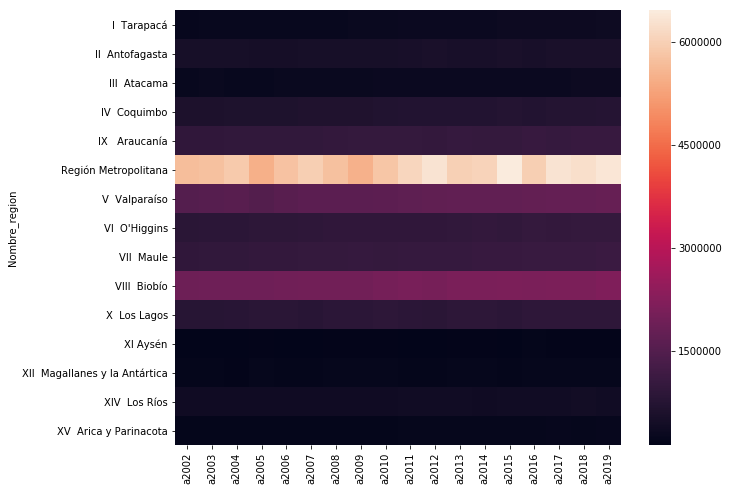

In [232]:
totalhabreg2=totalhabreg.drop(columns='orden')
plt.figure(figsize=(10, 8))
ax=sns.heatmap(totalhabreg2)
